# Karate Club

# Comparing  valuess of the 𝑝-centrality function with values of other centrality measures and the percentage of the differences


In [1]:
from mygraph import MyGraph
from helpers import *

In [2]:
# Building the graph 
nxg = nx.karate_club_graph()

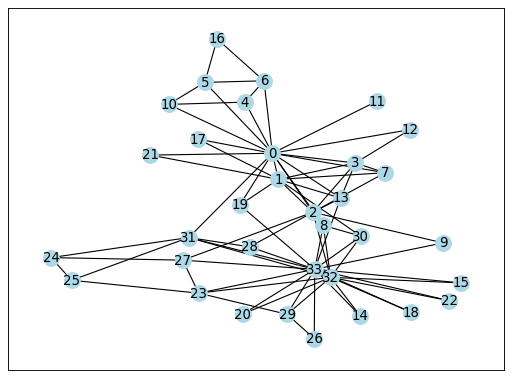

In [3]:
# drawing the graph
dg(nxg) # , pos='kamada')

In [4]:
closeness = nx.closeness_centrality(nxg)
closeness

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

In [5]:
# copying the graph into a MyGraph object
myg = copy_nx_graph(nxg)

In [6]:
def p_centrality(myg, p, radius, scaling_factor):
    """
    myg: a MyGraph object 
    p: a real number 0 < p < 1
    radius: the maxinum radius of circles around a node that are used to compute the p-centrality function
    scaling_factor: the scaling factor to make the p-centrality function comparable with closeness centrality
    returns: a dictionary whose keys are the nodes of the graph and the values are the p-centrality function of the corresponding node
    """
    ppc = {}
    for node in myg.get_vertex_list():
        circles = myg.circles(node, radius=radius)
        val = 0
        for i in range(radius):
            if i + 1 <= len(circles) - 1:
                val += len(circles[i+1])* p**i
        ppc[node] = val/scaling_factor
    return ppc

In [7]:
ppc = p_centrality(myg, 0.6, 5, 42)
errors = []
for x in ppc.keys():
    diff_percecntage = abs(ppc[x]-closeness[x])/closeness[x]
    errors.append(diff_percecntage)
    print(f" {x:<{2}} =>   c: {round(closeness[x], 3):<{7}}  p: {round(ppc[x], 3):<{7}} error: {round(100 * diff_percecntage, 3):<{5}} %")
    print("--------------------------------------------")
print("average error: ", round((100 * sum(errors))/len(errors), 3), "%")

 0  =>   c: 0.569    p: 0.578   error: 1.605 %
--------------------------------------------
 1  =>   c: 0.485    p: 0.494   error: 1.853 %
--------------------------------------------
 2  =>   c: 0.559    p: 0.55    error: 1.752 %
--------------------------------------------
 3  =>   c: 0.465    p: 0.466   error: 0.199 %
--------------------------------------------
 4  =>   c: 0.379    p: 0.381   error: 0.483 %
--------------------------------------------
 5  =>   c: 0.384    p: 0.391   error: 1.81  %
--------------------------------------------
 6  =>   c: 0.384    p: 0.391   error: 1.81  %
--------------------------------------------
 7  =>   c: 0.44     p: 0.438   error: 0.563 %
--------------------------------------------
 8  =>   c: 0.516    p: 0.502   error: 2.661 %
--------------------------------------------
 9  =>   c: 0.434    p: 0.424   error: 2.308 %
--------------------------------------------
 10 =>   c: 0.379    p: 0.381   error: 0.483 %
---------------------------------